In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import SimpleITK as sitk
import sys

In [2]:
%load_ext autoreload
%autoreload 2
#sys.path.append('../')
#from data_scripts.PI_CAI_Detection import PI_CAI_Detection
from radiomics_util import *

/u/home/seel/.conda/envs/conda-adlm/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
gt = pd.read_csv("/data1/practical-sose23/morphometric/picai_labels/clinical_information/marksheet.csv")
gt.head()

,patient_id,study_id,mri_date,patient_age,psa,psad,prostate_volume,histopath_type,lesion_GS,lesion_ISUP,case_ISUP,case_csPCa
0,10000,1000000,2019-07-02,73,7.7,NaN,55.0,MRBx,0+0,0,0,NO
1,10001,1000001,2016-05-27,64,8.7,0.09,102.0,NaN,NaN,NaN,0,NO
2,10002,1000002,2021-04-18,58,4.2,0.06,74.0,NaN,NaN,NaN,0,NO
3,10003,1000003,2019-04-05,72,13.0,NaN,71.5,SysBx,0+0,0,0,NO
4,10004,1000004,2020-10-21,67,8.0,0.10,78.0,SysBx+MRBx,"0+0,0+0","0,0",0,NO


# Collect Information


In [4]:
df = gt.copy()
df = df.apply(header_info, axis=1)
df

,patient_id,study_id,mri_date,patient_age,psa,psad,prostate_volume,histopath_type,lesion_GS,lesion_ISUP,...,spacing_2,size_0,size_1,size_2,origin,real_dimension_0,real_dimension_1,real_dimension_2,size_image,size_mask
0,10000,1000000,2019-07-02,73,7.70,NaN,55.0,MRBx,0+0,0,...,3.3,640,640,31,"(-109.22891616821, -76.614260508237, -84.29311...",180.000000,180.000000,102.299999,"(640, 640, 31)","(640, 640, 31)"
1,10001,1000001,2016-05-27,64,8.70,0.09,102.0,NaN,NaN,NaN,...,3.6,640,640,21,"(-119.80861242576, -65.872387498812, -38.77975...",192.000008,192.000008,75.600002,"(640, 640, 21)","(640, 640, 21)"
2,10002,1000002,2021-04-18,58,4.20,0.06,74.0,NaN,NaN,NaN,...,3.0,384,384,22,"(-75.958717345721, -101.90842263373, 12.320441...",192.000000,192.000000,66.000002,"(384, 384, 22)","(384, 384, 22)"
3,10003,1000003,2019-04-05,72,13.00,NaN,71.5,SysBx,0+0,0,...,3.0,384,384,23,"(-75.050601958758, -69.85840339031, -25.163462...",192.000000,192.000000,69.000002,"(384, 384, 23)","(384, 384, 23)"
4,10004,1000004,2020-10-21,67,8.00,0.10,78.0,SysBx+MRBx,"0+0,0+0","0,0",...,3.6,640,640,21,"(-81.364946364887, -95.368903586534, -26.19577...",192.000008,192.000008,75.599999,"(640, 640, 21)","(640, 640, 21)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,11471,1001495,2012-08-25,71,12.50,0.21,62.0,MRBx,"3+4,N/A,3+3","2,1",...,3.5,384,384,19,"(-97.750484605452, -77.4502615813, 22.10853373...",192.000000,192.000000,66.500000,"(384, 384, 19)","(384, 384, 19)"
1496,11472,1001496,2019-06-28,81,5.28,0.12,44.0,SysBx+MRBx,3+4,2,...,3.6,640,640,19,"(-97.75048839999, -69.636696595946, -10.762666...",192.000008,192.000008,68.400000,"(640, 640, 19)","(640, 640, 19)"
1497,11473,1001497,2017-09-24,56,29.60,0.34,87.0,MRBx,0+0,0,...,3.6,640,640,21,"(-134.6929564654, -68.377214345749, 10.8437984...",192.000008,192.000008,75.600000,"(640, 640, 21)","(640, 640, 21)"
1498,11474,1001498,2016-05-03,71,12.00,NaN,83.0,MRBx,3+3,1,...,3.6,312,312,23,"(-79.82086103324595, -90.33997085067111, -44.7...",195.000000,195.000000,82.799997,"(312, 312, 23)","(312, 312, 23)"


# Check results

In [18]:
print(df["real_dimension_0"].max(), df["real_dimension_1"].max(), df["real_dimension_2"].max())

195.3125 195.3125 135.30000061213414


dim 0
min: 180.0 0
mean: 191.10465803531235
max: 195.3125 1185


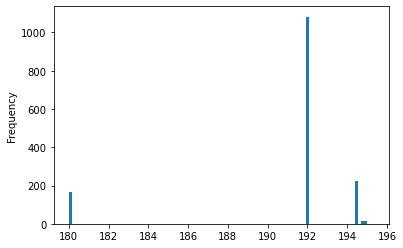

dim 1
min: 180.0 0
mean: 191.10465803531235
max: 195.3125 1185


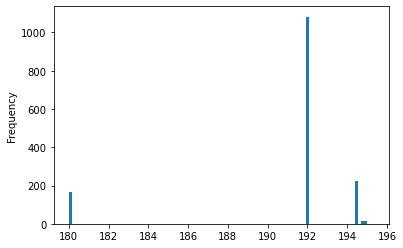

dim 2
min: 51.00000091787084 92
mean: 71.34961175223637
max: 135.30000061213414 281


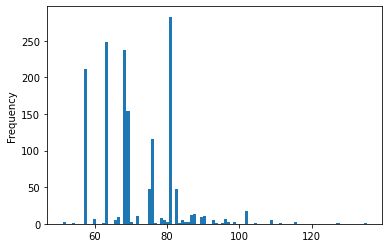

In [19]:
print("dim 0")
print("min:",  df["real_dimension_0"].min(),  df["real_dimension_0"].idxmin())
print("mean:", df["real_dimension_0"].mean())
print("max:",  df["real_dimension_0"].max(),  df["real_dimension_0"].idxmax())
df["real_dimension_0"].plot.hist(bins=100)
plt.show()

print("dim 1")
print("min:",  df["real_dimension_1"].min(),  df["real_dimension_1"].idxmin())
print("mean:", df["real_dimension_1"].mean())
print("max:",  df["real_dimension_1"].max(),  df["real_dimension_1"].idxmax())
df["real_dimension_1"].plot.hist(bins=100)
plt.show()

print("dim 2")
print("min:",  df["real_dimension_2"].min(),  df["real_dimension_2"].idxmin())
print("mean:", df["real_dimension_2"].mean())
print("max:",  df["real_dimension_2"].max(),  df["real_dimension_2"].idxmax())
df["real_dimension_2"].plot.hist(bins=100)
plt.show()

In [20]:
filter = df[df["real_dimension_2"] > 90]
filter

,study_id,patient_id,spacing_0,spacing_1,spacing_2,size_0,size_1,size_2,origin,real_dimension_0,real_dimension_1,real_dimension_2,Padding X (Start),Padding X (End),Padding Y (Start),Padding Y (End),Padding Z (Start),Padding Z (End)
0,1000000.0,10000.0,0.281250,0.281250,3.30,640.0,640.0,31.0,"(-109.22891616821, -76.614260508237, -84.29311...",180.000000,180.000000,102.299999,272.0,246.0,188.0,267.0,7.0,11.0
149,1000149.0,10147.0,0.281250,0.281250,3.30,640.0,640.0,31.0,"(-118.33734893799, -88.521301464052, -92.43310...",180.000000,180.000000,102.300003,291.0,197.0,225.0,210.0,10.0,7.0
205,1000205.0,10201.0,0.281250,0.281250,3.30,640.0,640.0,31.0,"(-68.746988296509, -75.839322768627, -47.63951...",180.000000,180.000000,102.299997,284.0,221.0,227.0,256.0,3.0,17.0
237,1000237.0,10233.0,0.281250,0.281250,3.30,640.0,640.0,35.0,"(-110.79727773841, -72.78737235232, -70.419355...",180.000000,180.000000,115.500001,242.0,241.0,229.0,228.0,4.0,17.0
270,1000270.0,10266.0,0.281250,0.281250,3.30,640.0,640.0,33.0,"(-108.2168674469, -74.685128436635, -69.410087...",180.000000,180.000000,108.900000,224.0,228.0,210.0,229.0,4.0,9.0
281,1000281.0,10276.0,0.281250,0.281250,3.30,640.0,640.0,41.0,"(-108.51417267582, -101.80228758875, -27.12069...",180.000000,180.000000,135.300001,240.0,222.0,212.0,221.0,10.0,11.0
300,1000300.0,10294.0,0.234375,0.234375,3.30,768.0,768.0,31.0,"(-72.795181273973, -105.54659677324, -32.03398...",180.000000,180.000000,102.299998,316.0,323.0,301.0,273.0,4.0,15.0
325,1000325.0,10319.0,0.281250,0.281250,2.20,640.0,640.0,45.0,"(-97.684107156767, -52.033291765794, 62.201892...",180.000000,180.000000,99.000003,197.0,251.0,212.0,132.0,3.0,0.0
351,1000351.0,10345.0,0.300000,0.300000,3.60,640.0,640.0,31.0,"(-123.52753966888, -87.92397432463, -17.572016...",192.000008,192.000008,111.599999,150.0,191.0,203.0,207.0,2.0,3.0
376,1000376.0,10370.0,0.281250,0.281250,3.30,640.0,640.0,31.0,"(-104.43391057172, -94.15557168457, 15.4303594...",180.000000,180.000000,102.300001,316.0,172.0,226.0,230.0,4.0,13.0


In [21]:
target_x = 194
target_y = 194
target_z = 90

0 0 3.727272583124078


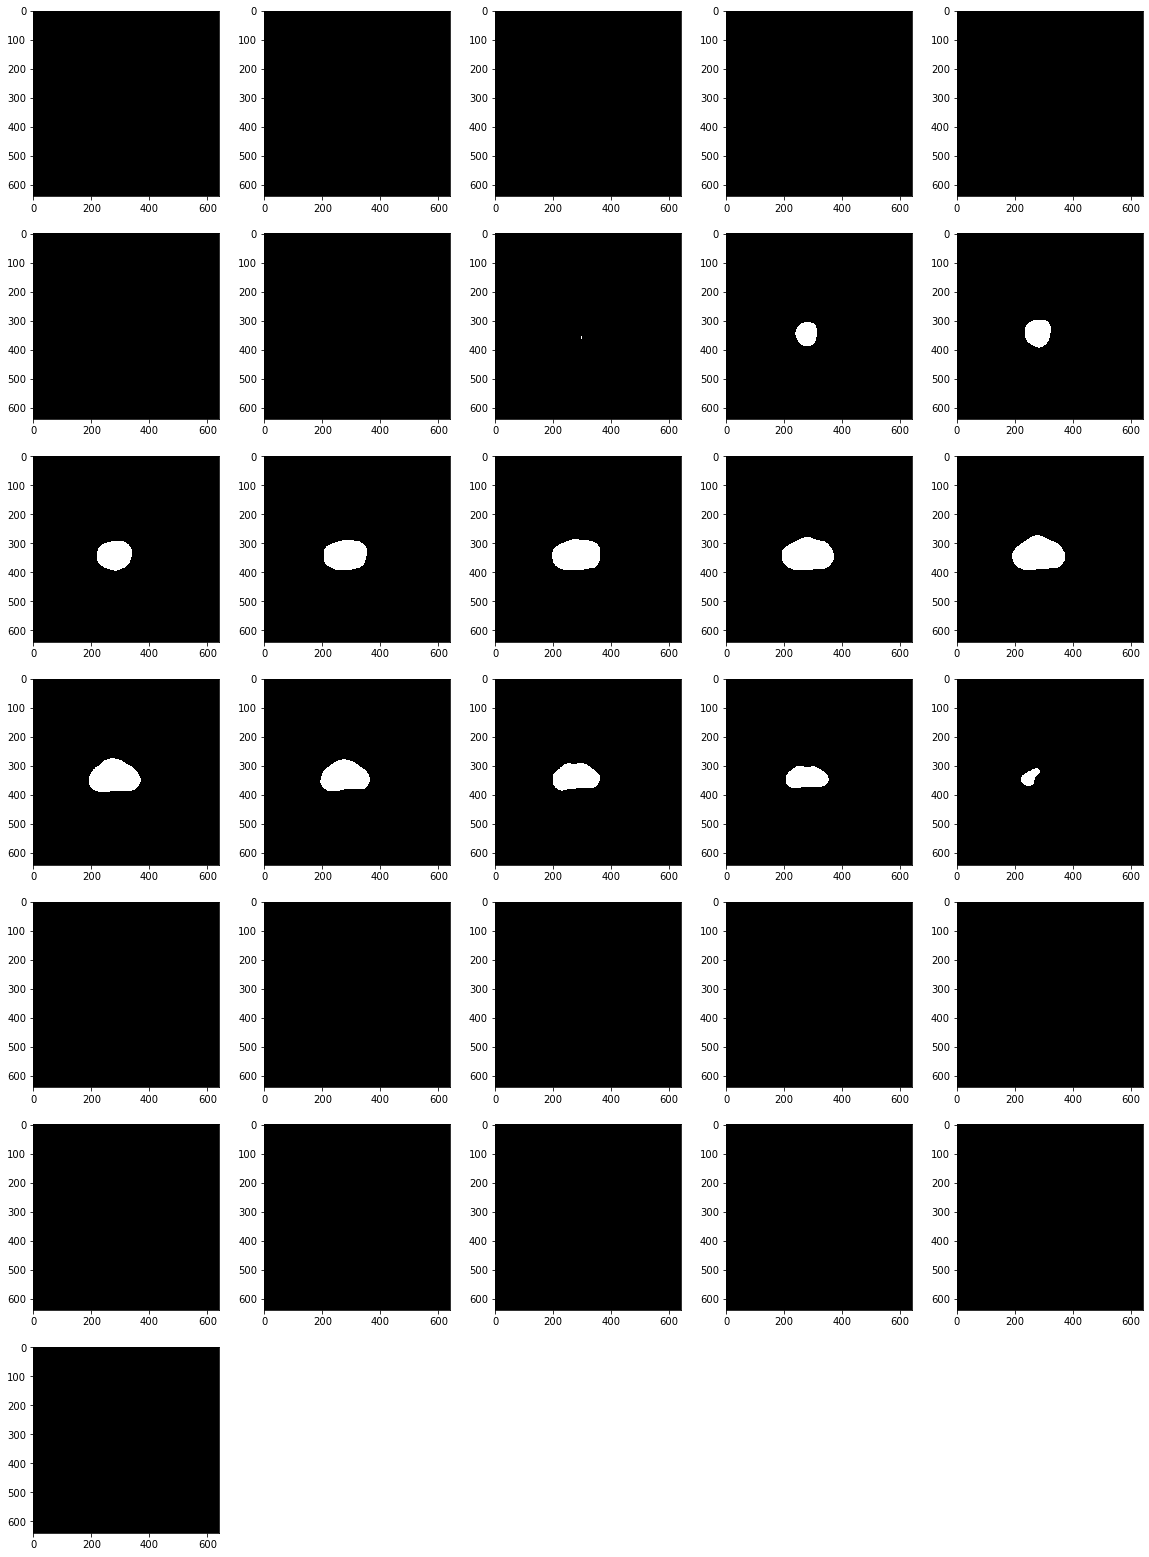

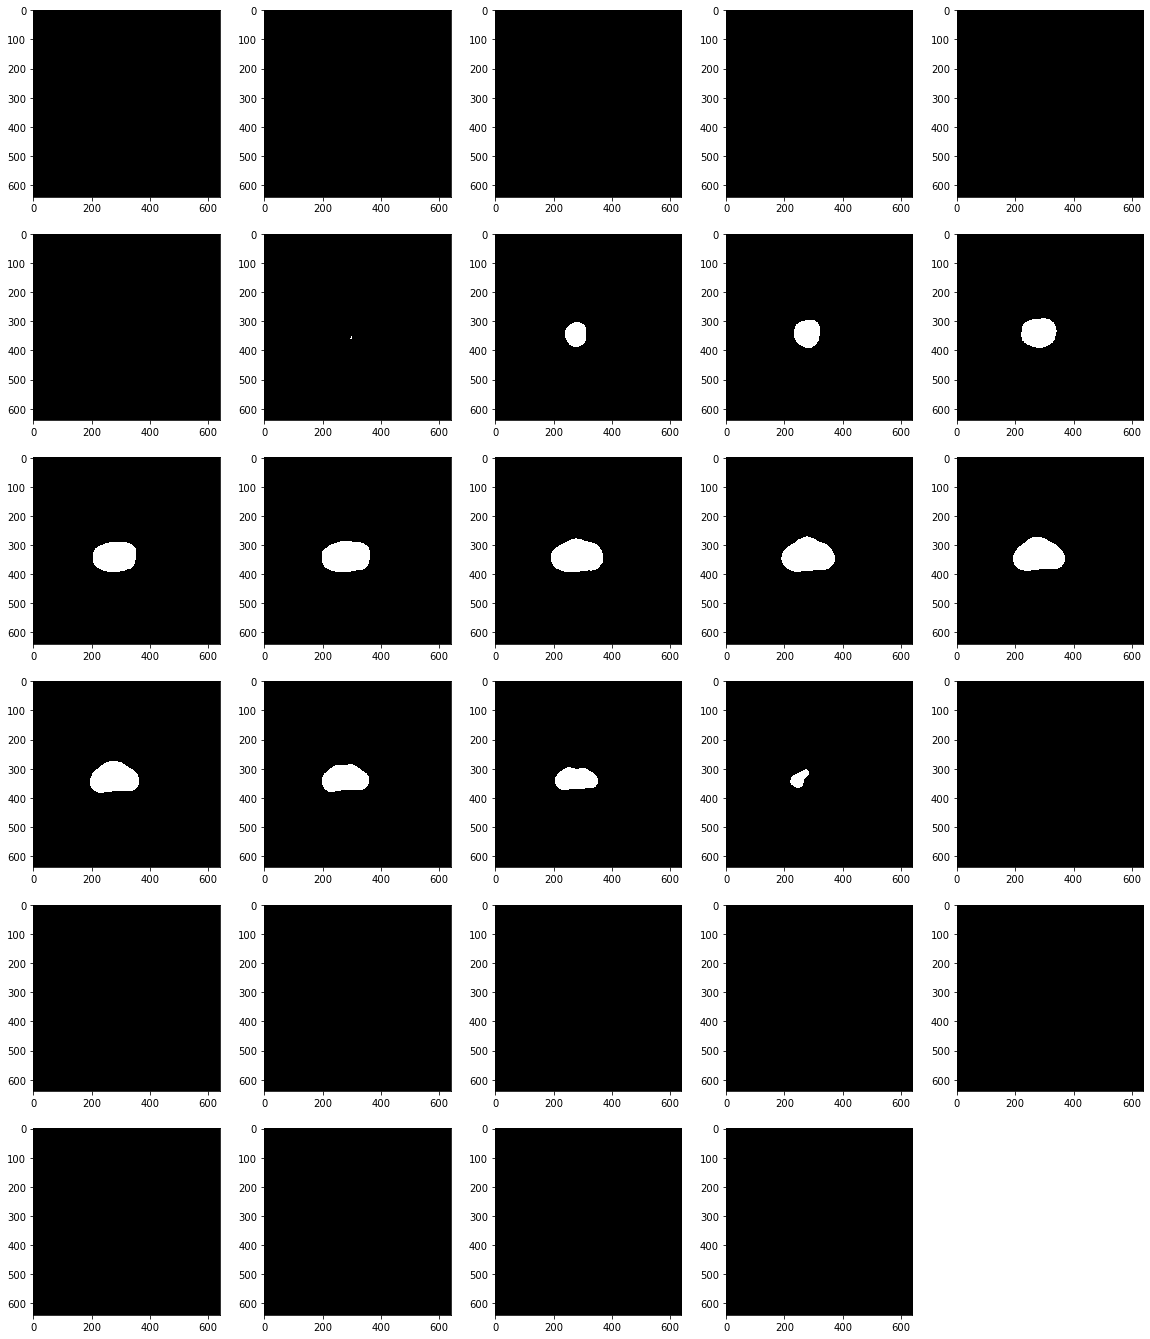

In [22]:
row = filter.iloc[0]
image, mask = get_image_and_segmentaion(int(row["patient_id"]), int(row["study_id"]))

crop_px_x = max((row["real_dimension_0"] - target_x)/row["spacing_0"],0)
crop_px_y = max((row["real_dimension_1"] - target_y)/row["spacing_1"],0)
crop_px_z = max((row["real_dimension_2"] - target_z)/row["spacing_2"],0)

print(crop_px_x, crop_px_y, crop_px_z)

plot_sitk(mask)

crop = sitk.CropImageFilter()
crop.SetLowerBoundaryCropSize([int(crop_px_x/2), int(crop_px_y/2), int(crop_px_z/2)])
crop.SetUpperBoundaryCropSize([int(crop_px_x/2), int(crop_px_y/2), int(crop_px_z/2)])
cropped_image = crop.Execute(image)
cropped_mask = crop.Execute(mask)

plot_sitk(cropped_mask)


In [14]:
for index,row in filter.iterrows():
    print(index)
    image, mask = get_image_and_segmentaion(int(row["patient_id"]), int(row["study_id"]))

    crop_px_x = max((row["real_dimension_0"] - target_x)/row["spacing_0"],0)
    crop_px_y = max((row["real_dimension_1"] - target_y)/row["spacing_1"],0)
    crop_px_z = max((row["real_dimension_2"] - target_z)/row["spacing_2"],0)

    crop = sitk.CropImageFilter()
    crop.SetLowerBoundaryCropSize([int(crop_px_x/2), int(crop_px_y/2), int(crop_px_z/2)])
    crop.SetUpperBoundaryCropSize([int(crop_px_x/2), int(crop_px_y/2), int(crop_px_z/2)])
    cropped_image = crop.Execute(image)
    cropped_mask = crop.Execute(mask)
    

    modality = "t2w"
    file = "{0}_{1}_{2}.mha".format(str(int(row["patient_id"])),str(int(row["study_id"])), modality)

    writer = sitk.ImageFileWriter()
    writer.SetFileName(data_path + str(int(row["patient_id"])) + "/" +  file)
    writer.Execute(cropped_image)

    file = "{0}_{1}.nii.gz".format(str(int(row["patient_id"])),str(int(row["study_id"])))
    writer = sitk.ImageFileWriter()
    writer.SetFileName(seg_guer_path + file)
    writer.Execute(cropped_mask)

9
15
18
22
27
41
58
65
67
68
74
79
80
85
93
95
102
103
105
110
111
114
135
136
141
144
164
167
171
176
177
187
198
206
219
222
225
226
227
249
256
257
261
263
267
271
279
282
283
286
287
291
292
295
302
313
321
327
336
337
348
350
355
359
369
378
393
395
396
398
424
425
432
433
440
445
450
455
461
465
480
486
490
494
498
499
501
509
514
518
521
522
532
536
537
538
550
551
552
553
559
560
561
571
581
584
585
592
595
601
603
621
627
629
633
640
641
655
656
658
663
682
684
686
687
690
692
703
708
710
720
728
736
744
751
759
772
778
784
799
801
806
810
814
823
824
825
828
834
835
838
857
863
875
879
883
890
894
901
904
913
914
917
921
922
927
930
932
938
942
944
948
949
952
953
954
955
957
967
974
985
986
989
1000
1023
1024
1025
1026
1028
1037
1038
1045
1059
1066
1069
1079
1083
1097
1100
1112
1120
1123
1124
1131
1139
1147
1154
1175
1179
1183
1185
1189
1197
1199
1200
1211
1215
1231
1238
1250
1255
1257
1259
1267
1269
1273
1283
1286
1291
1294
1301
1305
1311
1329
1339
1372
1374
1377
1403
1409
